In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import scipy
from scipy.interpolate import interp1d
from scipy import interpolate
import pixie_read_st as pxr

In [3]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [6]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [4]:
filepath = "/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/pixie3d.h5"

In [5]:
pxr.pixieload(filepath)

timesteps= 205
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'T=Te+Ti', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'V.(b x grad(psi))', 'V.grad(psi)', 'V||', 'chi', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1 pert', 'B^2 pert', 'B^3 pert', 'P^1 pert', 'P^2 pert', 'P^3 pert', 'Rho pert', 'p=pi+pe pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [7]:
psit = np.load("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/psit_J.npy")
B1 = np.load("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/B1_J.npy")
B2 = np.load("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/B2_J.npy")
B3 = np.load("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/B3_J.npy")

In [13]:
B1t = np.mean(B1,axis=2)
B2t = np.mean(B2,axis=2)

In [11]:
pxr.Axes_of_Interpolation(B3)
pxr.Grid_Interpolations(psit,B1,B2,B3)
pxr.Calculation_of_Units_and_Sizes()

Logical Grid Interpolations done. All array (A) interpolators take A_int.
Units and sizes calculated.


In [14]:
psi_min,norm = pxr.Normalization_numbers(psit,B1t,B2t);

[ 0.171875    0.26396341  0.2963589   0.31992738  0.33952517  0.35665827
  0.37194772  0.38586862  0.39867808  0.41056174  0.42166067  0.43204346
  0.44186393  0.451195    0.46009853  0.46862472  0.47681414  0.4847023
  0.49228812  0.49963014  0.50675081  0.51367036  0.52040581  0.52697273
  0.53338488  0.53965476  0.54579483  0.5518038   0.55769528  0.56348505
  0.56918181  0.5747922   0.58032257  0.58577858  0.59116547  0.59648785
  0.60175006  0.60695653  0.61210835  0.61720698  0.62225666  0.62726324
  0.63222984  0.63715817  0.64205044  0.64690859  0.65173436  0.65652943
  0.66129532  0.66603352  0.6707454   0.67543184  0.68009277  0.68472863
  0.68934291  0.69393736  0.69851234  0.70306882  0.7076077   0.71212973
  0.71663565  0.72112617  0.72560198  0.7300636   0.73451177  0.73894727
  0.74336923  0.74777752  0.75217446  0.7565609   0.76093682  0.76530268
  0.76965888  0.77400575  0.77834361  0.78267279  0.7869936   0.79130629
  0.79561113  0.79990859  0.80419857  0.80848058  0.

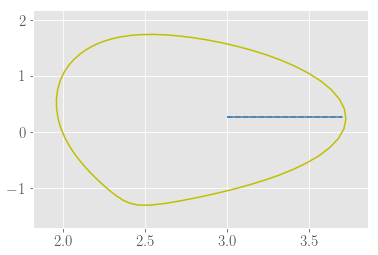

In [233]:
Ind = np.unravel_index(np.argmin(psit[:,:]),(psit.shape[0],psit.shape[1])) # find index of magnetic axis
r_ind = Ind[0] 
u_ind = Ind[1]

X0 = pxr.X[r_ind,u_ind,0] # x,z locations of magnetic axis
Z0 = pxr.Z[r_ind,u_ind,0]

r_ma_log = pxr.CnvNumber2LogicalR(r_ind) # r,u logical coordinates of magnetic axis 
u_ma_log = pxr.CnvNumber2LogicalU(u_ind)

cs1 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psit[:,:]-psi_min[0])/(norm[0]-psi_min[0]),levels=[0.95],colors="y")
for i in range(len(cs1.collections[0].get_paths())): # get the coordinates of q_95 surface
    p1 = cs1.collections[0].get_paths()[i]
    v1 = p1.vertices
    x_l = v1[:,0] 
    y_l = v1[:,1]
    
    L = int(np.floor(len(v1[:,0])/10)) # Length of branch suitable for interpolation
    
# Choose part of flux surface suitable for interpolation
if Z0 > y_l[0]: # magnetic axis higher than 1st point of flux surface
    list_fs_x = list(x_l[0:L]) # pick upper branch
    list_fs_y = list(y_l[0:L])
else:
    list_fs_x = list(x_l[-L:-1]) # pick lower branch
    list_fs_y = list(y_l[-L:-1])

#plt.plot(X0,Z0,"x")
#plt.plot(list_fs_x,list_fs_y,linestyle="dashed",color="b")
#plt.axhline(y=Z0)
xmin = min(pxr.X[:,int(pxr.X.shape[1]/2),0])
xmax = max(pxr.X[:,0,0])
xhl_list = np.linspace(xmin,xmax,100) # list of points for horizontal line interpolation
zhl_list = Z0*np.ones(100)

# Interpolation of the two lines
flux_surf_interp = scipy.interpolate.interp1d(list_fs_x,list_fs_y,fill_value="extrapolate")
hline_interp = scipy.interpolate.interp1d(xhl_list,zhl_list,fill_value="extrapolate")

# defines error that needs to be minimized to find crossing
def difference(x):
    return np.abs(hline_interp(x)-flux_surf_interp(x))
# find crossing point: NEEDS INITIAL GUESS
Xx = scipy.optimize.fsolve(difference,x0=3.4)
#plt.plot(Xx,Z0,"s")
H_line = np.linspace(X0,Xx,100) # horizontal line that connects magnetic axis and q95 surface

# convert X,Z0 pairs to logical coordinates in the shaped grid
r_of_hline = [r_ma_log] # start with first position being the magnetic axis. Procedure leaves a systematic error of 2cm.
u_of_hline = [u_ma_log]
for x in H_line[1:]:
    r,u = pxr.pntCnvInGrid_shaped(x,Z0,r_of_hline[-1],u_of_hline[-1]) # last position is initial guess for new one
    r_of_hline.append(r)
    u_of_hline.append(u)

# Because of the systematic error, find the actual x-values to which these r,u pairs correspond     
H_line_resulted = pxr.X_int((r_of_hline,u_of_hline,0)) 
H_line_zero = pxr.X_int((r_of_hline,0,0)) 
plt.plot(H_line_resulted,Z0*np.ones(100),linestyle="dashed")
plt.plot(H_line_zero,Z0*np.ones(100))
#plt.ylim(Z0-0.1,Z0+0.1)
#plt.xlim(3.0,3.5)
#print(r_of_hline)
# psin values of those points    
psi_val_list = (pxr.psit_int((r_of_hline,u_of_hline))-psi_min[0])/(norm[0]-psi_min[0])

# R(psin) interpolation
r_of_psin = interp1d(psi_val_list,r_of_hline, kind = "cubic", fill_value = "extrapolate")

# Final r(psin) list
psin_list = np.linspace(0.0,1.0,101)
r_of_psin_list = r_of_psin(psin_list)
print(r_of_psin_list)

## Check grid conversion

In [206]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

R =  1.9546783790099824
Z =  0.8561444456348555
r_cnv =  0.887763101057
u_cnv =  2.80489722744
R_cnv =  1.9459559209919532
Z_cnv =  0.8539825541875192


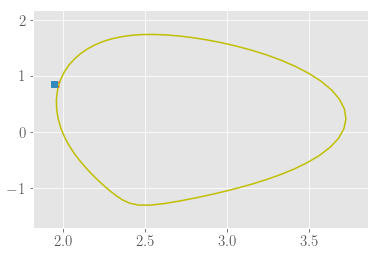

In [207]:
r_start = 0.88
u_start = 2.8
R_start = pxr.X_int((r_start,u_start,0))
Z_start = pxr.Z_int((r_start,u_start,0))
print("R = ", R_start)
print("Z = ", Z_start)
r_cnv,u_cnv = pxr.pntCnvInGrid_shaped(pxr.X_int((r_start,u_start,0)),pxr.Z_int((r_start,u_start,0)),0.7,2.5)
print("r_cnv = ", r_cnv)
print("u_cnv = ", u_cnv)
R_cnv = pxr.X_int((r_cnv,u_cnv,0))
Z_cnv = pxr.Z_int((r_cnv,u_cnv,0))
print("R_cnv = ", R_cnv)
print("Z_cnv = ", Z_cnv)
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psit[:,:]-psi_min[0])/(norm[0]-psi_min[0]),levels=[0.95],colors="y")
plt.plot(pxr.X_int((r_start,u_start,0)),pxr.Z_int((r_start,u_start,0)),"x")
plt.plot(pxr.X_int((r_cnv,u_cnv,0)),pxr.Z_int((r_cnv,u_cnv,0)),"s")
plt.show()